In [8]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [9]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 14s 0us/step


(50000, 32, 32, 3)

In [10]:
X_test.shape

(10000, 32, 32, 3)

In [11]:
y_train.shape

(50000, 1)

In [13]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [14]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [15]:
y_test = y_test.reshape(-1,)

In [16]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [21]:
def plot_sample(X, y, index):
    plt.figure(figsize = (30,4))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

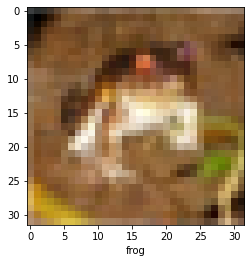

In [22]:
plot_sample(X_train, y_train, 0)

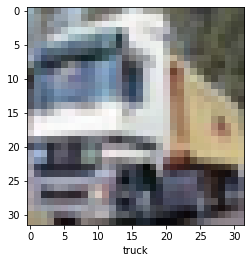

In [24]:
plot_sample(X_train, y_train, 1)

In [25]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [26]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 9s 4ms/step - loss: 1.8111 - accuracy: 0.3537
Epoch 2/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.6192 - accuracy: 0.4278
Epoch 3/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.5372 - accuracy: 0.4563
Epoch 4/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4792 - accuracy: 0.4777
Epoch 5/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4291 - accuracy: 0.4973
Epoch 6/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3869 - accuracy: 0.5123
Epoch 7/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3476 - accuracy: 0.5242
Epoch 8/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.3134 - accuracy: 0.5395
Epoch 9/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.2816 - accuracy: 0.5483
Epoch 10/20
1563/1563 [==============================] - 6s 4ms/step - loss: 1.249

In [28]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 4ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.63      0.50      0.56      1000
           1       0.73      0.60      0.66      1000
           2       0.31      0.60      0.41      1000
           3       0.43      0.24      0.31      1000
           4       0.32      0.66      0.43      1000
           5       0.66      0.19      0.30      1000
           6       0.69      0.45      0.55      1000
           7       0.69      0.48      0.57      1000
           8       0.55      0.77      0.64      1000
           9       0.67      0.52      0.58      1000

    accuracy                           0.50     10000
   macro avg       0.57      0.50      0.50     10000
weighted avg       0.57      0.50      0.50     10000



In [30]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [31]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [32]:
cnn.fit(X_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 13s 4ms/step - loss: 1.4065 - accuracy: 0.4994
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0638 - accuracy: 0.6301
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9385 - accuracy: 0.6750
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8526 - accuracy: 0.7055
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7843 - accuracy: 0.7287
Epoch 6/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.7240 - accuracy: 0.7483
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6707 - accuracy: 0.7660
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6195 - accuracy: 0.7837
Epoch 9/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5764 - accuracy: 0.7966
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.53

In [34]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.9394 - accuracy: 0.7033


[0.9393946528434753, 0.7032999992370605]

In [35]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 2ms/step


array([[1.0924444e-02, 3.9383673e-04, 2.0267526e-03, 8.3349288e-01,
        1.3431996e-03, 1.2463726e-01, 1.7143006e-02, 3.0507415e-04,
        9.4578657e-03, 2.7567014e-04],
       [5.8780514e-02, 8.6731330e-02, 2.8402014e-06, 3.8258378e-07,
        2.4763096e-07, 5.3026206e-09, 9.6234709e-10, 7.6921101e-09,
        8.5443580e-01, 4.8879436e-05],
       [2.7507648e-01, 2.1880122e-01, 2.5088761e-02, 2.2004493e-02,
        6.2863710e-03, 1.9264249e-04, 1.6430125e-03, 7.6960784e-04,
        2.7669063e-01, 1.7344679e-01],
       [9.6613806e-01, 1.5837267e-02, 3.4003097e-03, 1.9016804e-03,
        2.5259992e-04, 4.4101895e-07, 9.7171778e-06, 2.2877198e-06,
        1.2212705e-02, 2.4499011e-04],
       [1.0422440e-08, 1.9281940e-08, 1.1615476e-03, 6.0690101e-03,
        9.7687066e-01, 2.3016437e-05, 1.5875580e-02, 5.0893473e-08,
        3.5371688e-08, 1.4431537e-08]], dtype=float32)

In [36]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [37]:
y_test[:10]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1], dtype=uint8)

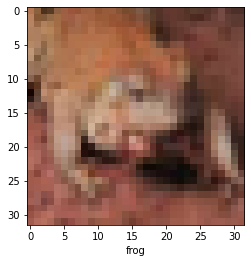

In [38]:
plot_sample(X_test, y_test,5)

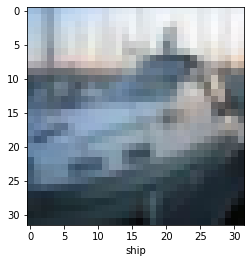

In [39]:
plot_sample(X_test, y_test,2)

In [40]:
classes[y_classes[2]]

'ship'

In [41]:
classes[y_classes[5]]

'frog'

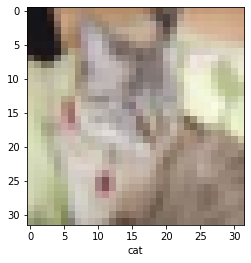

In [42]:
plot_sample(X_test, y_test,8)

In [43]:
classes[y_classes[8]]

'cat'